<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

## How to work on the assignment

I expect 3 files from each group:
* **A file containing the best predictions from your best model (20%)**
* **A Jupyter notebook containing all the work the team did in order to deliver the best predictions (40%)**
* **A business report (40%)** explaining:
    * The goal
    * The work performed: include some detail about data cleaning, feature engineering and modelling
    * The results: meaningful metrics for the best models
    * Visualizations

No group presentation is expected for this assignment.

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
* [2. Data analysis](#2)  
  * [2.1.Explanation of variables](#2.1)
      * [1.2.1 XX](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libaries used </font>

In [ ]:
!pip install squarify

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
#from yellowbrick.classifier import ROCAUC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id='1'></a>
##  <font color=green>1.Import the Data </font>
Let’s load the training data and create data frame

In [2]:
data_train = pd.read_csv("train.csv")
data_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Let's keep the original dataset for later comparisons and make a copy for the FE process

In [3]:
df_original = data_train.copy()

In [4]:
data_train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [5]:
data_test = pd.read_csv("test.csv")
data_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_test.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,...,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,298066.500000,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,...,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,163359.093603,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,...,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,15121.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156593.750000,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,298066.500000,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,439539.250000,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From comparing the train and test datasets we get the following conclusions:

- Difference between train and test datasets appear to be the last column with the cover type where prediction (y) has to be made
- Soil types are not consistent between train and test. Some soil types are unique of train and others only appear in test

<a id='2'></a>
# <font color=green>2. Data analysis</font>
To understand dataframe, let’s look at the data types, the data shape and descriptive statistics.
All features are integers. 

<a id='2.1'></a>
## <font color=green>__2.1.Explanation of variables__</font><br>
__Elevation__ / quantitative /meters / Elevation in meters <br>
__Aspect__ / quantitative / azimuth / Aspect in degrees azimuth <br>

<img src="Azimuth.png" width=600 height=200 align="center">

__Slope__ / quantitative / degrees / Slope in degrees <br>
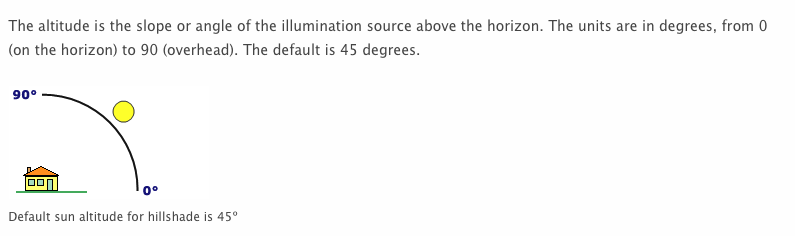
__Horizontal_Distance_To_Hydrology__ / quantitative / meters / Horz Dist to nearest surface water features <br>
__Vertical_Distance_To_Hydrology__ / quantitative / meters / Vert Dist to nearest surface water features <br>
__Horizontal_Distance_To_Roadways__ / quantitative / meters / Horz Dist to nearest roadway <br>
__Hillshade_9am__ / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice <br>
__Hillshade_Noon__ / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice <br>
__Hillshade_3pm__ / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice <br>

<img src="Hillshade.png" width=800 height=200 align="center">

__Horizontal_Distance_To_Fire_Points__ / quantitative / meters / Horz Dist to nearest wildfire ignition points <br>
__Wilderness_Area (4 binary columns)__ / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation <br>
__Soil_Type (40 binary columns)__ / qualitative / 0 (absence) or 1 (presence) / Soil Type designation <br>
__Cover_Type (7 types)__ / integer / 1 to 7 / Forest Cover Type designation <br>

Source: https://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-analyst-toolbox/how-hillshade-works.htm <br>
The wilderness areas are:

1 - Rawah Wilderness Area <br>
2 - Neota Wilderness Area  <br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

<img src="satellite1.png" width=1600 height=400 align="center">

<img src="satellite3.png" width=1600 height=400 align="center">

Source: Google My Maps, own made map based on wilderness area

<img src="satellite2.png" width=1600 height=800 align="center">

<img src="satellite.png" width=1600 height=800 align="center">

Example of Moran soil mapping, source:https://casoilresource.lawr.ucdavis.edu/sde/?series=moran#extent

Estimated distance between areas to the centre of each. There is an approximate 25 km distance between nearest areas

Based on the book  "Statistical Methods and Applications in Forestry and Environmental Sciences" by Chandra et al. (2020), Chapter (Forest Cover-Type Prediction Using Model Averaging) DOI: 10.1007/978-981-15-1476-0, we group the soil types based on the USFS ecological land type units (ELUs), and supplementary provide the details of first digit for climatic zone and second digit for geologic zone of USFS ELU code.

The soil types based on USFS ELUs code:<br>
<table>
  <tr>
    <th><b>Soil Type</b></th>
    <th><b>USFS ELU Code</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
<td>1  </td>
    <td> <b>2702<b></td>
      <td> Cathedral family - Rock outcrop complex, extremely stony</td>
  </tr>
  <tr>
    <td>2  </td>
    <td><b><i>2703</i></b> 
    <td> Vanet - Ratake families complex, very stony</td>

  </tr>
  <tr>
    <td>3</td>
    <td><b>2704</b></td>
    <td> Haploborolis - Rock outcrop complex, rubbly</td>
  </tr>
  <tr>
    <td>4</td>
    <td><b>2705</b> </td>
    <td> Ratake family - Rock outcrop complex, rubbly</td>
  </tr>
  <tr>
    <td>5</td>
    <td><b>2706</b> </td>
    <td> Vanet family - Rock outcrop complex complex, rubbly</td>
  </tr>
  <tr>
    <td>6</td>
    <td><b><i>2717</i></b></td>
    <td> Vanet - Wetmore families - Rock outcrop complex, stony</td>
  <tr>
    <td>7</td>
    <td><b>3501</b> </td>
    <td> Gothic family</td>
  </tr>
  <tr>
    <td>8</td>
    <td><b>3502</b></td>
    <td> Supervisor - Limber families complex</td>
  </tr>
  <tr>
    <td>9</td>
    <td><b>4201</b> </td>
    <td> Troutville family, very stony</td>
  </tr>
  <tr>
    <td>10</td>
    <td><b>4703</b> </td>
    <td> Bullwark - Catamount families - Rock outcrop complex, rubbly</td>
  </tr>
  <tr>
    <td>11</td>
    <td><b><i>4704</i></b></td>
    <td> Bullwark - Catamount families - Rock land complex, rubbly</td>
  <tr>
    <td>12</td>
    <td><b>4744</b> </td>
    <td> Legault family - Rock land complex, stony</td> 
  </tr>
  <tr>  
    <td>13</td>
    <td><b>4758</b> </td>
    <td> Catamount family - Rock land - Bullwark family complex, rubbly</td>
  </tr>
  <tr>
    <td>14</td>
    <td><b>5101</b></td>
    <td> Pachic Argiborolis - Aquolis complex</td>
  </tr>
  <tr>
    <td>15</td>
    <td><b>5151</b> </td>
    <td> unspecified in the USFS Soil and ELU Survey</td>
  </tr>
  <tr>
    <td>16</td>
    <td><b>6101</b> </td>
    <td> Cryaquolis - Cryoborolis complex</td>
  </tr>
  <tr>
    <td>17</td>
    <td><b><i>6102</i></b></td>
    <td> Gateview family - Cryaquolis complex</td>
  <tr>
    <td>18</td>
    <td><b>6731</b> </td>
    <td> Rogert family, very stony</td>
  </tr>
  <tr>  
    <td>19</td>
    <td><b>7101</b> </td>
    <td> Typic Cryaquolis - Borohemists complex</td>
  </tr>
  <tr>
    <td>20</td>
    <td><b>7102</b></td>
    <td> Typic Cryaquepts - Typic Cryaquolls complex</td>
  </tr>
  <tr>
    <td>21</td>
    <td><b>7103</b> </td>
    <td> Typic Cryaquolls - Leighcan family, till substratum complex</td>
  </tr>
  <tr>
    <td>22</td>
    <td><b>7201</b> </td>
    <td> Leighcan family, till substratum, extremely bouldery</td>
  </tr>
  <tr>
    <td>23</td>
    <td><b><i>7202</i></b></td>
    <td> Leighcan family, till substratum - Typic Cryaquolls complex</td>
  <tr>
    <td>24</td>
    <td><b>7700</b> </td>
    <td> Leighcan family, extremely stony</td>
  </tr>
  <tr>  
    <td>25</td>
    <td><b>7701</b> </td>
    <td> Leighcan family, warm, extremely stony</td>
  </tr>
  <tr>
    <td>26</td>
    <td><b>7702</b></td>
    <td> Granile - Catamount families complex, very stony</td>
  </tr>
  <tr>
    <td>27</td>
    <td><b>7709</b> </td>
    <td> Leighcan family, warm - Rock outcrop complex, extremely stony</td>
  </tr>
  <tr>
    <td>28</td>
    <td><b>7710</b> </td>
    <td> Leighcan family - Rock outcrop complex, extremely stony</td>
  </tr>
  <tr>
    <td>29</td>
    <td><b><i>7745</i></b></td>
    <td> Como - Legault families complex, extremely stony</td>
  <tr>
    <td>30</td>
    <td><b>7746</b> </td>
    <td> Como family - Rock land - Legault family complex, extremely stony</td>

  </tr>
  <tr>  
    <td>31</td>
    <td><b>7755</b> </td>
    <td> Leighcan - Catamount families complex, extremely stony</td>
  </tr>
  <tr>
    <td>32</td>
    <td><b>7756</b></td>
    <td> Catamount family - Rock outcrop - Leighcan family complex, extremely stony</td>
  </tr>
  <tr>
    <td>33</td>
    <td><b>7757</b> </td>
    <td> Leighcan - Catamount families - Rock outcrop complex, extremely stony</td>
  </tr>
  <tr>
    <td>34</td>
    <td><b>7790</b> </td>
    <td> Cryorthents - Rock land complex, extremely stony</td>
  </tr>
  <tr>
    <td>35</td>
    <td><b><i>8703</i></b></td>
    <td> Cryumbrepts - Rock outcrop - Cryaquepts complex</td>
  <tr>
    <td>36</td>
    <td><b>8707</b> </td>
    <td> Bross family - Rock land - Cryumbrepts complex, extremely stony</td>

  </tr>
  <tr>
    <td>37</td>
    <td><b>8708</b> </td>
    <td> Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony</td>
  </tr>
  <tr>
    <td>38</td>
    <td><b>8771</b> </td>
    <td> Leighcan - Moran families - Cryaquolls complex, extremely stony</td>
  </tr>
  <tr>
    <td>39</td>
    <td><b><i>8772</i></b></td>
    <td> Moran family - Cryorthents - Leighcan family complex, extremely stony</td>
  <tr>
    <td>40</td>
    <td><b>8776</b> </td>
    <td> Moran family - Cryorthents - Rock land complex, extremely stony</td>

Source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data<br>

<img src="climate_geo.png" width=600 height=300 align="center">

In [ ]:
data_train.dtypes

We have 56 features with the test set consist of 15120 rows. 

In [ ]:
data_train.shape

We have 56 columns: the target variable Cover Type and 55 more features to work with. Let's analyze a little bit more each of them to check if we need to clean or preprocess them.

In [ ]:
data_train.columns

Vertical_Distance_To_Hydrology seems to have positive and negative values. Checking the negative values we observed that few are lying on an average altitude of Denver, which is 1500 metres, these values are likely patches bellow a water deposit in the mountain. We should nevertheless apply an absolute conversion to avoid any uncertainty

In [ ]:
data_train.describe()

<a id='3'></a>
# <font color=green> 3. Exploratory Data Analysis<font> 
<a id='3.1'></a>    
### <font color=green> 3.1. Analysis of the dataset using EDA <font> 

The pandas profiling gives us the information that the data is formatted and clean: There are no null values and all features are numeric. We have 12 numeric values and 44 Categorial values. 
The soil and wilderness area are already one-hot-encoded columns.<br>
The alert show us that Soiltype 7 and soiltype 15 are always zero. And there are several highly correlated features as well. 

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(data_train, minimal=False)
report

* __ID__: As unique values, consider dropping it from the analysis.<br>
* __Elevation__: Has very few values above 3500meters, which makes sense as the higher the altitude the less tree grow there.<br>
* __Aspect__: Has high correlation with the Hillshade variables<br>
* __Slope__: Has high correlation with the Hillshade variables, there seem to be values outside the norm around 25degrees<br>
* __Cover_Type__: Cover Type are equal distributed, each Cover Type are represented in an equally.<br>
* __Soil_Type15__ and __Soil_Type7__: No values, consider removing them but first check if these are also exist in the testing data to confirm our thought. <br>
* __Soil_Type28,36,25,9 and 8__: Very few values, seems to be rather scare soil types. <br>

Checking if the Soil_Type 15 and Soil_Type7 should be removed based on the test data. Since both do exist with values in the test set, we cannot test these as these do not exist in the test set.

In [ ]:
data_test = pd.read_csv("test.csv")

In [ ]:
data_test['Soil_Type15'].value_counts()

In [ ]:
data_test['Soil_Type7'].value_counts()

The numerical variables seem to not be normal distributed. All variables though are not normal distributed.

To ascertain this, we will use the statistical D'Agostino and Pearson's test below. The following conclusions are made:

- All features are more skewed.   
- The features that measure distance are positively skewed. 
- Hillshade 9 am and Noon has a similar left-skewed distribution. 
- None of the features follow a normal distribution, which is confirmed by the statistical Shapiro test for normality.

<a id='3.2'></a> 
### <font color=green> 3.2. D'Agostino and Pearson's Test <font> 
The numerical variables seem to not be normal distributed in the Pandas Profiling Report. However we will test this with the Shapiro test below and it confirms the initial analysis that the features do not follow a Gaussian Distribution at a significance level of 95%. All features are skewed. 

In [ ]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
alpha = 0.05
for i in (['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']):
    print ()
    print (i)
    stat, p = normaltest(data_train[[i]])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('The data follows Gaussian Distribution (fail to reject H0)')
    else:
        print('The data does not follow Gaussian Distribution  (reject H0)')

<a id='3.3'></a> 
### <font color=green>3.3.Checking Variable Completeness <font> 

Check for completeness of Wilderness data. Since Wilderness is One Hot Encoded, we want to check if all the values sum up to 15120 or if we have values which are entered as zero or even 1, meaning the values are entered twice in two different Wilderness. 

The below show that the values are all together sum up to 15120, which shows us the completeness of the Wilderness area and uniqueness of the wilderness area. 

In [ ]:
data_train.iloc[:,11:15].sum(axis=1).sum()

Same for the Soil, we check if the data is adding up to 15120 to see if there are values entered as zero and actually give us missing information. 

Similarly, the data is complete and there are no entered values with zero. 

In [ ]:
data_train.iloc[:,15:55].sum(axis=1).sum()

<a id='3.4'></a> 
### <font color=green>3.4.Correlation Matrix <font> 
Looking at the features which are highly correlated with a threshold above 0.5: <br>
* __Vertical_Distance_To_Hydrology__ positivly correlated to __Horizontal_Distance_To_Hydrology__ <br>
* __Horizontal_Distance_To_Roadways__ positivly correlated to __Elevation__  <br>
* __Hillshade_9am__ negativly correlated and __Hillshade_3pm__ positivly correlated to __Aspect__<br>
* __Hillshade_Noon__ negativly correlated to __Slope__<br>
* __Hillshade variables__ are also correlated between themselves,but Hillshade 3pm and Hillshade 9am are negative correlated <br>
* __Wilderness Area 4__ is highly correlated with Elevation <br>

In [ ]:
#Heatmap 
matrix = data_train.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(120,60))
heatmap = sns.heatmap(matrix, center=0, fmt=".2f", square=True, annot=True, linewidth=.9, mask = mask,vmax=.7);
plt.show()

In [ ]:
matrix ["Vertical_Distance_To_Hydrology"].sort_values(ascending=False)

In [ ]:
matrix ["Elevation"].sort_values(ascending=False)

In [ ]:
matrix ["Hillshade_9am"].sort_values(ascending=False)

In [ ]:
matrix ["Wilderness_Area4"].sort_values(ascending=False)

In [ ]:
# Performing reverse One Hot Encoding using Pandas idxmax ( variables used for EDA and Data analysis only)
# With this, we make later EDA statistics

data_train['Wilderness'] = (data_train.iloc[:, 11:15] == 1).idxmax(1)
data_train['Soil'] = (data_train.iloc[:, 15:56] == 1).idxmax(1)

In [ ]:
data_train['Cover_Type1'] = data_train['Cover_Type'].replace([1,2,3,4,5,6,7],['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'])
data_train['Wilderness'] = data_train['Wilderness'].replace(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'],['Rawah Wilderness Area ','Neota Wilderness Area','Comanche Peak Wilderness Area','Cache la Poudre Wilderness Area'])
data_train.head()

In [ ]:
data_test['Wilderness'] = (data_test.iloc[:, 11:15] == 1).idxmax(1)
data_test['Soil'] = (data_test.iloc[:, 15:56] == 1).idxmax(1)
data_test['Wilderness'] = data_test['Wilderness'].replace(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'],['Rawah Wilderness Area ','Neota Wilderness Area','Comanche Peak Wilderness Area','Cache la Poudre Wilderness Area'])

<a id='3.5'></a> 
### <font color=green>3.5.Paired density, scatterplot matrix and 3D Graphics <font>

In seaborn we can observe the following:<br>
* Elevation differentiate the cover types very well 
* Slope, almost all Cover Types overlap 
* very skewed distribtutions of Horizontal/Vertical Distance to Hydrology, Horizontal Distance to Roadways and firepoints 

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

g = sns.PairGrid(data_train, vars = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'],hue='Cover_Type1', diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

In [ ]:
sns.set_theme(style="white")

g = sns.PairGrid(data_train, vars = ['Hillshade_9am','Hillshade_Noon','Hillshade_3pm'],hue='Cover_Type1', diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

Checking the values in the test set 

#COMMENTED OUT AS NOTEBOOK DIES HERE (PEDRO)

- Hillshade 3pm  have some null values and looking at the graphical distribution it seems more these are missing values as these do not follow the pattern of the graph. 

- But looking at the Hilshade noon and hilshade 9am it looks  these are not null in their case. 

- Since Hilshade 9am and Hilshade 3pm are negativly correlated, we can impute the values based on the correlation. 

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
label_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
temp_df = data_train[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].copy()
temp_df['Cover_Type'] = [label_names[i-1] for i in data_train['Cover_Type']]

fig = px.scatter_3d(
    temp_df, 
    x='Hillshade_9am', 
    y='Hillshade_Noon', 
    z='Hillshade_3pm',
    color='Cover_Type',
    title='Hillshade Features in 3-D',
    opacity=0.2, 
    color_discrete_sequence=px.colors.qualitative.Plotly[:7],
    width=1000, height=800
    )

fig.show()

In [ ]:
label_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
temp_df = data_train[['Slope', 'Elevation', 'Aspect']].copy()
temp_df['Cover_Type'] = [label_names[i-1] for i in data_train['Cover_Type']]

fig = px.scatter_3d(
    temp_df, 
    x='Slope', 
    y='Elevation', 
    z='Aspect',
    color='Cover_Type',
    title='Hillshade Features in 3-D',
    opacity=0.2, 
    color_discrete_sequence=px.colors.qualitative.Plotly[:7],
    width=1000, height=800
    )

fig.show()

In [ ]:
label_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
temp_df = data_train[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology']].copy()
temp_df['Cover_Type'] = [label_names[i-1] for i in data_train['Cover_Type']]

fig = px.scatter_3d(
    temp_df, 
    x='Horizontal_Distance_To_Roadways', 
    y='Horizontal_Distance_To_Fire_Points', 
    z='Horizontal_Distance_To_Hydrology',
    color='Cover_Type',
    title='Hillshade Features in 3-D',
    opacity=0.2, 
    color_discrete_sequence=px.colors.qualitative.Plotly[:7],
    width=1000, height=800
    )

fig.show()

<a id='3.6'></a>
### <font color=green>__3.6.Categorial EDA__</font><br>

<a id='3.6.1'></a>
#### <font color=green>__3.6.1.Categorial Bar Diagrams__</font><br>

- __Area1__ has four dominant Cover types: Mainly Lodgepole Pine, Spruce/Fir, Aspen and bit Krummholz. <br>
- __Area2__ has three Cover Types but are small in numbers: Krummholz, Spruce/Fir and Lodgepole Pine. <br>
-  __Area3__ has six Cover Types in decreasing order Krummholz, Aspen, Douglas-fir, Lodgepole Pine, Spruce/Fir and Ponderosa Pine.<br>
-  __Area4__ has four dominant Cover types in decreasing order: Cottonwood/Willow, Ponderosa Pine, Douglas-fir and Lodgepole Pine. 

In [ ]:
#Checking attributes one more time
data_train.head()

In [ ]:
import seaborn as sns
#Changed Wilderness for Cover_Type as I got an error, did you do feature engineering prior to this step_?
sns.catplot(y="Wilderness", hue='Cover_Type1', kind="count",
            palette='rainbow_r', edgecolor=".6",
            data = data_train)

Highlights only: 
There are few Soil Types where there are few Cover Types or not existing cover Types, most of them are stony soil types like Soil Types 18,24,5,9,28,34,37,36,26,27 and 25. Few are from other soil types like 16,20,19,8 and 21. <br>
__Soil_Type3__ (Haploborolis - Rock outcrop complex, rubbly) : Mainly Cover Type __Cottonwood__ <br>
__Soil_Type4__ (Ratake family - Rock outcrop complex, rubbly) :__Ponderosa Pine__ <br>
__Soil_Type10__ (Bullwark - Catamount families - Rock outcrop complex, rubbly): Mainly __Douglas-fir and Ponderosa Pine__ <br>
__Soil_Type23__ (Leighcan family, till substratum - Typic Cryaquolls complex): Mainly __Spruce/Fir__<br>
__Soil_Type29__ (Como - Legault families complex, extremely stony) : __Lodgepole Pine, Spruce/Fir__<br>
__Soil_Type30__ (Como family - Rock land - Legault family complex, extremely stony): __Aspen__<br>
__Soil_Type38__ (Leighcan - Moran families - Cryaquolls complex, extremely stony): Mainly __Krummholz__<br>
__Soil_Type39__ (Moran family - Cryorthents - Leighcan family complex, extremely stony): Mainly __Krummholz__<br>
__Soil_Type40__ (Moran family - Cryorthents - Rock land complex, extremely stony): Mainly __Krummholz__

In [ ]:
soil_dummies = data_train.loc[:,data_train.columns.str.startswith('Soil_Type')]
soil = soil_dummies.idxmax(axis=1)
soil.name = 'Soil'
data_train['Soil'] = soil
plt.figure(figsize=(12,5))
sns.countplot(x='Soil',data=data_train,palette='rainbow',order = data_train['Soil'].value_counts().index);
plt.xticks(rotation=90);

In [ ]:
sns.catplot(y="Soil", hue='Cover_Type1', kind="count",
            palette='rainbow_r', edgecolor=".6",
            data=data_train,height=30, aspect=0.2)


<a id='3.6.2'></a>
#### <font color=green>__3.6.2.Violinplot with Dependent Variable__</font><br>

Violinplot shows the distribution of the Cover_Types against the numerical variables: 

1. __Spruce/Fir__: 
    - Slope is lower <br>
    
2. __Lodgepole Pine__: 
    - Slope is lower <br>
    
3. __Ponderosa Pine__: 
    - Closer to the road than other cover types<br>
    
4. __Cottonwood/Willow__:
    - Closer to the road than other cover types
    - Found on lower elevation
    - Lowest horizontal distance to hydrology is lower and less spread than the other coverTypes
    - Vertical distance to hydrology is more above the sea level than below, Hildshade 9am is high<br>
    
5. __Aspen__: 
    - Hildshade 9am is high <br>
    
6. __Douglas-fir__: 
    - Closer to the road than other cover types, Hildshade 9am is very spread<br>
    
7. __Krummholz__: 
    - Found on higher elevation, Slope is lower <br>

* Elevation has the highest variance among the different Cover_Types
* Aspect on the other hand is fairly equally spread among the different Cover_Types 

In [ ]:
vars= ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology']
fig, axs = plt.subplots(1, len(vars), figsize=(25,5))
for i in range(0,len(vars)):
    sns.violinplot( y=data_train[vars[i]],x=data_train['Cover_Type1'], data=data_train,ax=axs[i],palette = 'rainbow_r')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)

In [ ]:
vars= ['Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
fig, axs = plt.subplots(1, len(vars)-1, figsize=(25,5))
for i in range(0,len(vars)-1):
    sns.violinplot( y=data_train[vars[i]],x=data_train['Cover_Type1'], data=data_train,ax=axs[i],palette = 'rainbow_r')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)

<a id='3.6.3'></a>
#### <font color=green>__3.6.3.Treemap for categorial Data__</font><br>
In order to see the distribution of the treemap features we are checking which features are more represented than others.<br>
You can see on the Soil Type that Soil Type 10 is represented the most, than Soil Type 29 and then Soil Type 3. 

#### Treemap Graph by Soil Type on the Train Dataset 

In [ ]:
# Prepare Data for Treemap graph

df = data_train.groupby('Soil').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Treemap Native Country - Train ')
plt.axis('off')
plt.show()

#### Treemap Graph by Soil Type on the Test Dataset 

In [ ]:
df = data_test.groupby('Soil').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Treemap Native Country - Train ')
plt.axis('off')
plt.show()

In [ ]:
# Prepare Data
df = data_train.groupby('Wilderness').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Treemap Native Country - Train ')
plt.axis('off')
plt.show()

For the Wilderness Area: Wilderness Area 3 is highly represented (42%), then Area 4 (31%) , Area 1 (24%) and Area 2 (3%). 

Checking the test data for the same wilderniss area as an comparision if the distribution is similar on wilderness

In [ ]:
# Prepare Data
df = data_test.groupby('Wilderness').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Treemap Native Country - Train ')
plt.axis('off')
plt.show()

As already seen in the Pandas Profiling Report Cover Type is equally distributed. 

### Similarly, can we see by wilderness area what are the predominant cover types? That way we can start making an association with the type of soil


In [ ]:
# Prepare Data
df = data_train.groupby('Cover_Type1').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Treemap Native Country - Train ')
plt.axis('off')
plt.show()

In [ ]:
import plotly.express as px
fig = px.treemap(data_train, path=[px.Constant("all"), 'Cover_Type1', 'Wilderness'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(data_train, path=[px.Constant("all"), 'Cover_Type1', 'Wilderness','Soil'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<a id='4'></a>
# <font color=green> 4.Baseline dataset <font>

Basic benchmark without deploying any feature engineering. The dataset without any modifications is used to use as a Baseline Model for future improvements. In addition we use only basic Hyperparameters and did not fine tune these in the Baseline model as well. 

<a id='4.0'></a>
## <font color=green>  0.Prepare Data and Standardization<font>

In [ ]:
#!pip install yellowbrick

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Assign y and drop irrelevant features for x

In [ ]:
X=data_train.drop(labels=['Id','Cover_Type','Wilderness','Cover_Type1','Soil'],axis=1)
y=data_train['Cover_Type']

Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. Since we have very skewed data, standardization is much less affected by outliers. The scale mean is zero and the standardization is 1.  Also important we do not scale dummy variables, since these are 0 and 1, we leave them out. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X[scale_numerical]=scaler.fit_transform(X[scale_numerical])
X.head()

Do an additional split on the train dataset (data)

We take for the Baseline model the exact same random state seed of 18. Since the train set was not random and the cover types were equally spread, we stratify the splitt of the train into a train and validation set and what to keep the balanced dataset with stratification. 

In [ ]:
X_train,X_val,y_train,y_val = train_test_split (X,y,random_state=37,stratify=y) #seed is 18!

Testing the distribution of the cover types to ensure they are balanced among both train and validation set 

In [ ]:
y_train.value_counts()

In [ ]:
y_val.value_counts()

Fit model on the subsplit train

<a id='4.1'></a>
## <font color=green>  1.Random Forest<font>

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

Baseline score with random forest 20 on original dataframe

In [ ]:
forest.score(X_val,y_val)

In [ ]:
# Make predictions for the test set
y_pred_test_forest = forest.predict(X_val)

In the confusion matrices below, the rows represent the true labels and the columns represent predicted labels. Values on the diagonal represent the % of times where the predicted label matches the true label. Values in all other cells represent instances where the classifier mislabeled an observation; the column tells us what has been predicted, and the row tells us the correct predicted labels, which you can see on the diagonal. 

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_test_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

__Precision__:Correctly-identified number of classes divided by the model predicted classes. In case of Spur/Fir (1), the precision score is low. Meaning that the number of correctly -identified Spur/Fir divided by all correct or wrong predicted Spur/Fir (TP/(TP+FP))<br>
__Recall__(Sensitivity,True Positive Rate): The ratio of correct positive predictions to the total positive examples (TP/(TP+FN)). For Spur/Fir the number of actual Spur/Fir that the prediction classified correctly as such. <br>
__F1-score__: Measures of a model accuracy on a dataset. It combines precision and recall and can tell you if the model is good. The aim is to get close to 1. As you can see it is very low for Spur/Fir<br>
__Accuracy__: Ratio of correctly predicted examples by the total examples. (TP+TN)/(TP+TN+FP+FN) which is 84% <br>

In [ ]:
print(classification_report(y_val, y_pred_test_forest))

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    model_forest, palette = 'rainbow_r')
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show();

In [ ]:
def plot_ROC_curve(model, X_train,y_train, X_val, y_val):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={1: 'Spruce/Fir', 
                                        2: 'Lodgepole Pine', 
                                        3: 'Ponderosa Pine',
                                       4: 'Cottonwood/Willow',
                                       5: 'Aspen',
                                       6: 'Douglas-fir',
                                       7: 'Krummholz'})

                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train,y_train)
    visualizer.score(X_val, y_val)
    visualizer.show()
    
    return visualizer

https://medium.com/swlh/how-to-create-an-auc-roc-plot-for-a-multiclass-model-9e13838dd3de

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
plot_ROC_curve(model_forest, X_train,y_train, X_val, y_val)

https://www.statology.org/plot-multiple-roc-curves-python/ <br>
https://afioto.medium.com/classification-visualizations-with-yellowbrick-d6f6150d7a32


### Deploying model in test dataset (data_test)

The categorial variables of test that we added earlier for EDA needs to be removed as well

In [ ]:
pred=forest.predict(data_test.drop(labels=['Id','Wilderness','Soil'], axis=1))

In [ ]:
submission=pd.DataFrame(data=pred,columns=['Cover_Type'])
submission

### Pinpoint ID to prediction in data_test

In [ ]:
submission['Id']=data_test['Id']
submission

<a id='4.2'></a>
## <font color=green> 2.Gradient Boosting<font>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

## Check convention for prediction

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
model_gb = gb_clf2.fit(X_train, y_train)
y_pred_test_gb = gb_clf2.predict(X_val)

print("Classification Report")
print(classification_report(y_val, y_pred_test_gb))

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_test_gb)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    model_gb, palette = 'rainbow_r')
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show();

In [ ]:
plot_ROC_curve(model_gb, X_train,y_train, X_val, y_val)

<a id='4.3'></a>
## <font color=green>  3.Decision Trees<font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
tree = DecisionTreeClassifier(random_state=18)
model_tree = tree.fit(X_train, y_train)

In [ ]:
y_pred_tr = tree.predict(X_train)
y_pred_ts = tree.predict(X_val)

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_ts)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print("Training Results:\n")
print(classification_report(y_train, y_pred_tr))
print("\nTesting Results:\n")
print(classification_report(y_val, y_pred_ts))

In [ ]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
visualizer = ClassPredictionError(
    model_tree, palette = 'rainbow_r')
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show();

In [ ]:
plot_ROC_curve(model_tree, X_train,y_train, X_val, y_val)

### Baseline with decision trees (CV)

In [ ]:
cv_score = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
cv_score.mean()

<a id='4.4'></a>
## <font color=green> 4.K-Nearest Neighbors (KNN)<font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
model_knn = knn.fit(X_train, y_train)

In [ ]:
y_pred_tr_knn = knn.predict(X_train)
y_pred_ts_knn = knn.predict(X_val)

In [ ]:
print(knn.score(X_val,y_val))

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_ts_knn)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print("Training Results:\n")
print(classification_report(y_train, y_pred_tr_knn))
print("\nTesting Results:\n")
print(classification_report(y_val, y_pred_ts_knn))

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    model_knn, palette = 'rainbow_r')
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show();

In [ ]:
plot_ROC_curve(model_knn, X_train,y_train, X_val, y_val)

In [ ]:
submission_knn = pd.DataFrame(data=pred,columns=['Cover_type'])
test_id = data_test['Id']
submission_knn['id'] = test_id
submission_knn.set_index('id',inplace=True)
submission_knn


https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/<br>
https://towardsdatascience.com/are-you-solving-ml-clustering-problems-using-k-means-68fb4efa5469

<a id='4.5'></a>
## <font color=green> 5.Logistic Regression<font>

In [ ]:
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define the multinomial logistic regression model
log = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate the model and collect the scores
n_scores = cross_val_score(log, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model_log = log.fit(X_train, y_train)

In [ ]:
y_pred_tr_log = log.predict(X_train)
y_pred_ts_log = log.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_val, y_pred_ts_log))

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_ts_log)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    model_log, palette = 'rainbow_r')
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show();

In [ ]:
plot_ROC_curve(model_log, X_train,y_train, X_val, y_val)

<a id='4.6'></a>
## <font color=green> 6.Naive Bayes<font>
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
model_bayes = bayes.fit(X_train, y_train)

In [ ]:
bayes.score(X_val,y_val)

In [ ]:
y_pred_tr_bayes = bayes.predict(X_train)
y_pred_ts_bayes = bayes.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_ts_bayes))

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_ts_bayes)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    model_bayes, palette = 'rainbow_r')
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show();

In [ ]:
plot_ROC_curve(model_bayes, X_train,y_train, X_val, y_val)

<a id='3'></a>
# <font color=green> Model Comparison <font>

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes). Since we do not have a inbalance of classes and all classes are evently distributed we can use the macro-average, which are equal to the micro-average of all algorithms.  

## Work it out in Python

<table>
  <tr>
    <th><b>Algorithms</b></th>
    <th><b>Accuracy</b></th>
    <th><b>Precision</b></th>
    <th><b>Recall</b></th>
    <th><b>F1</b></th>
  </tr>
  <tr>
<td>Random Forest  </td>
    <td> <b>0.84<b></td>
      <td> 0.84</td>
      <td> 0.85</td>
      <td> 0.84</td>
  </tr>
  <tr>
    <td>Gadient Boosting  </td>
    <td><b><i>0.67</i></b> 
    <td> 0.67</td>
    <td> 0.67</td>
    <td> 0.66</td>
  </tr>
  <tr>
    <td>Decision Trees</td>
    <td><b>0.78</b></td>
    <td> 0.78</td>
    <td> 0.78</td>
    <td> 0.78</td>
  </tr>
  <tr>
    <td>K- Nearest Neighbors(KNN)</td>
    <td><b>0.78</b> </td>
    <td> 0.79</td>
    <td> 0.78</td>
    <td> 0.78</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td><b>0.72</b> </td>
    <td> 0.72</td>
    <td> 0.72</td>
    <td> 0.72</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td><b>0.48</b> </td>
    <td> 0.57</td>
    <td> 0.48</td>
    <td> 0.39</td>
  </tr>     
  </tr>
</table>


Our best model is __Random Forest__, so this will be our baseline model to compare with.

## Code to make it in python but doesnt work, check

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

<a id='3'></a>
# <font color=green> 3.Feature Engineering <font>

### <font color=green> 3.1 Check for Anomalies and Outliers <font>

Since the z-score is sensitive to the  mean and standard deviation and its assumption of a normally distributed variable, we cannot use the z-score for outlier handleing because of the skewed data. The disadvantage using percentile it consoders always and outlier of the lowest or highest value, even there are no outliers. As the number of observations increases, so does the number of observations considered outliers; After all, using a percentile based method will always flat-out reject a certain percentage of our observations.Thus, we need to use the percentile with care. 

### Outlier Detection Treatment using Inter-Quartile Range rule

The IQR is the difference between the 75th and 25th percentile. The IQR is more resistant to outliers. The IQR by definition only covers the middle 50% of the data, so outliers are well outside this range and the presence of a small number of outliers is not likely to change this significantly. If you add an outlier, the IQR will change to another set of data points that are probably not that dissimilar to the previous ones (in most datasets), hence it is “resistant” to change. This is especially the case of a large dataset.

Now we are testing different ranges for IQR, namely 2,3 and 4 to check for more extreme outlier values. 

In [ ]:
def outlier_function(df, col_name,value_IQR):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(value_IQR*IQR)
    lower_limit = first_quartile-(value_IQR*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

### Inter-Quartile Range rule: 4 IQR from Median

In [ ]:
# loop through all columns to see if there are any outliers, for all values which are not only 0 and 1
for column in ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]:
    if outlier_function(data_train, column,4)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data_train, column,4)[2], column))

There is 1 record of Hillshade_9am with a zero value, which is a valid value as Hillshade can be zero. Hence we keep the value as it is. 

In [ ]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Vertical_Distance_To_Hydrology'], 25), percentile(data_train['Vertical_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 4
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_vd_h = data_train[(data_train['Vertical_Distance_To_Hydrology'] > lower) & (data_train['Vertical_Distance_To_Hydrology'] < upper)]

Check if the model improves after removing vertical distance to hydrology 

In [ ]:
X4=data_train_vd_h.drop(labels=['Id','Cover_Type','Wilderness','Cover_Type1','Soil'],axis=1)
y4=data_train_vd_h['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X4[scale_numerical]=scaler.fit_transform(X4[scale_numerical])

In [ ]:
y4.value_counts()

In [ ]:
X4_train,X4_val,y4_train,y4_val = train_test_split(X4,y4,random_state=37) #seed is 18!Cannot use stratify because the datset is unbalanced

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X4_train,y4_train)

Comparing the previous score with the new score after removing the outliers of vertical distance to Hydrology: previous __forest.score: 0.83968__

In [ ]:
# calculating accuracy_score
forest.score(X4_val,y4_val)

__Replacing with Median__<br>
Since it improved our performance of our model, I would still use median values to keep a balanced sample set otherwise the data becomes unbalanced

In [ ]:
med = np.median(data_train['Vertical_Distance_To_Hydrology'])
for i in data_train['Vertical_Distance_To_Hydrology']:
    if i > upper or i < lower:
            data_train['Vertical_Distance_To_Hydrology_n'] = data_train['Vertical_Distance_To_Hydrology'].replace(i, med)

In [ ]:
Xmed=data_train.drop(labels=['Id','Cover_Type','Wilderness','Cover_Type1','Soil','Vertical_Distance_To_Hydrology'],axis=1)
ymed=data_train['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology_n',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
Xmed[scale_numerical]=scaler.fit_transform(Xmed[scale_numerical])

In [ ]:
ymed.value_counts()

In [ ]:
Xmed_train,Xmed_val,ymed_train,ymed_val = train_test_split(X4,y4,random_state=37) #seed is 18!Cannot use stratify because the datset is unbalanced

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(Xmed_train,ymed_train)

In [ ]:
# calculating accuracy_score
forest.score(Xmed_val,ymed_val)

### Inter-Quartile Range rule: 3 IQR from Median

In [ ]:
# loop through all columns to see if there are any outliers, for all values which are not only 0 and 1
for column in ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]:
    if outlier_function(data_train, column,3)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data_train, column,3)[2], column))

In [ ]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Hydrology'], 25), percentile(data_train['Horizontal_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_hd_h3 = data_train[(data_train['Horizontal_Distance_To_Hydrology'] > lower) & (data_train['Horizontal_Distance_To_Hydrology'] < upper)]

In [ ]:
X3_hd=data_train_hd_h3.drop(labels=['Cover_Type','Wilderness','Cover_Type1','Soil'],axis=1)
y3_hd=data_train_hd_h3['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_hd[scale_numerical]=scaler.fit_transform(X3_hd[scale_numerical])

In [ ]:
X_train_hd,X_val_hd,y_train_hd,y_val_hd = train_test_split (X3_hd,y3_hd,random_state=37) #seed is 18!

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_hd,y_train_hd)

In [ ]:
forest.score(X_val_hd,y_val_hd)

__Vertical_Distance_To_Hydrology__

In [ ]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Vertical_Distance_To_Hydrology'], 25), percentile(data_train['Vertical_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_vd_h3 = data_train[(data_train['Vertical_Distance_To_Hydrology'] > lower) & (data_train['Vertical_Distance_To_Hydrology'] < upper)]

In [ ]:
X3=data_train_vd_h3.drop(labels=['Cover_Type','Wilderness','Cover_Type1','Soil'],axis=1)
y3=data_train_vd_h3['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3[scale_numerical]=scaler.fit_transform(X3[scale_numerical])

In [ ]:
X_train,X_val,y_train,y_val = train_test_split (X3,y3,random_state=37) #seed is 18!

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

The improvement from previous removal of outliers of Vertical Distance to Hydrology is not so incremental anymore in addition we would remove several points in the dataset, we will disregard this option of the 49 datapoints 

In [ ]:
# calculating accuracy_score
forest.score(X_val,y_val)

In [ ]:
X_train.shape

__Horizontal_Distance_To_Roadways__<br>
Taking out the outliers of roadways does not improve the model it actually gets worse.

In [ ]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Roadways'], 25), percentile(data_train['Horizontal_Distance_To_Roadways'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_rw = data_train[(data_train['Horizontal_Distance_To_Roadways'] > lower) & (data_train['Horizontal_Distance_To_Roadways'] < upper)]

In [ ]:
X3_rw=data_train_rw.drop(labels=['Cover_Type','Wilderness','Cover_Type1','Soil'],axis=1)
y3_rw=data_train_rw['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_rw[scale_numerical]=scaler.fit_transform(X3_rw[scale_numerical])

In [ ]:
X_train,X_val,y_train,y_val = train_test_split (X3_rw,y3_rw,random_state=37) #seed is 18!

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

In [ ]:
# calculating accuracy_score
forest.score(X_val,y_val)

__Horizontal_Distance_To_Fire_Points__<br>
Taking out the outliers of roadways does not improve the model it actually gets worse. 

In [ ]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Fire_Points'], 25), percentile(data_train['Horizontal_Distance_To_Fire_Points'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_fp = data_train[(data_train['Horizontal_Distance_To_Fire_Points'] > lower) & (data_train['Horizontal_Distance_To_Fire_Points'] < upper)]

In [ ]:
X3_fp=data_train_fp.drop(labels=['Cover_Type','Wilderness','Cover_Type1','Soil'],axis=1)
y3_fp=data_train_fp['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_fp[scale_numerical]=scaler.fit_transform(X3_fp[scale_numerical])

In [ ]:
X_train,X_val,y_train,y_val = train_test_split (X3_fp,y3_fp,random_state=37) #seed is 18

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

In [ ]:
# calculating accuracy_score
forest.score(X_val,y_val)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Hillshade_9am', 'Hillshade_Noon']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

Hillshade outliers are legitimite as zero means there is no sunlight, thus we will keep the values of zero. 

## <font color=green> Feature engineering of the features <font>
#### <font color=green> Drop ID as it has unique value <font> 

In [ ]:
#We agree for the test to not remove ID!!!

In [ ]:
data_train.drop('Id',axis = 1, inplace = True)

#### <font color=green> Distance To Hydrology <font> 

We combine Vertical distance to Hydrology and Horizontal distance to Hydrology since these two are highly correlated and also we can transform it into one variable which would give the distance to the closest water surface and using Pythagoras 
theorem for Distance calculation, since we have the horizontal and the vertical Distance. 
Source : https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

In [ ]:
data_train['Distance_To_Hydrology'] = data_train['Horizontal_Distance_To_Hydrology']**2 +data_train['Vertical_Distance_To_Hydrology']**2
data_train['Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5
data_train.head()

Now we are checking the distribution of the new created variable if further transformation is needed. The Distance to Hydrology is still positive skewed and has zero values. In order to use log we will use log + 1 in oder to use logarithm with zero values. 

In [ ]:
print("Skew\n", data_train['Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['Distance_To_Hydrology'].max(),)

In [ ]:
from scipy.stats import norm
import scipy.stats as stats

fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Distance_To_Hydrology'], hist = True, fit = norm, color='green',kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['log10_Distance_To_Hydrology'] = np.log10(data_train['Distance_To_Hydrology']+1)

In [ ]:
data_train['sqr_Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['log10_Distance_To_Hydrology'], hist = True, fit = norm,color = 'orange', kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
print("Skew\n", data_train['log10_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['log10_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['log10_Distance_To_Hydrology'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['sqr_Distance_To_Hydrology'], hist = True, color= 'darkgreen', fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
print("Skew\n", data_train['sqr_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['sqr_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['sqr_Distance_To_Hydrology'].max(),)

As you can see above, for distance to Hydrology the square root showed a better performance in terms of skewness and is closer to a normal bell shaped than the logarithm transformation. 

#### <font color=green> Horizontal Distance To Roadways <font> 

For log transformation there should be no zeros, negative values and the distribution should be positive skwed( bigger than 1 is positive) hence we are using the square root 

https://www.youtube.com/watch?v=_c3dVTRIK9c

In [ ]:
print("Skew\n", data_train['Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['Horizontal_Distance_To_Roadways'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Horizontal_Distance_To_Roadways'], hist = True, fit = norm, color='green', kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['Sqr_Horizontal_Distance_To_Roadways'] = data_train['Horizontal_Distance_To_Roadways']**0.5
data_train['log_Horizontal_Distance_To_Roadways'] = np.log(data_train['Horizontal_Distance_To_Roadways']+1)
data_train['log10_Horizontal_Distance_To_Roadways'] = np.log10(data_train['Horizontal_Distance_To_Roadways']+1)

In [ ]:
print("Skew\n", data_train['Sqr_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['Sqr_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['Sqr_Horizontal_Distance_To_Roadways'].max(),)


In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Sqr_Horizontal_Distance_To_Roadways'], hist = True, color= 'darkgreen', fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
print("Skew\n", data_train['log_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_Roadways'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['log_Horizontal_Distance_To_Roadways'], hist = True,color = 'orange', fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['log_log_Horizontal_Distance_To_Roadways'] = np.log(data_train['log_Horizontal_Distance_To_Roadways']+1)

In [ ]:
print("Skew\n", data_train['log_log_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['log_log_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['log_log_Horizontal_Distance_To_Roadways'].max(),)

In [ ]:
print("Skew\n", data_train['log10_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['log10_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['log10_Horizontal_Distance_To_Roadways'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['log10_Horizontal_Distance_To_Roadways'], hist = True, color = 'orange',fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
normaltest(data_train['log10_Horizontal_Distance_To_Roadways'])

We achieved the best result for square root of the Horizontal Distance to Roadways 

#### <font color=green> Slope <font> 

In [ ]:
print("Skew before transformation\n", data_train['Slope'].skew(), 
      "\nmin\n", data_train['Slope'].min(),
      "\nmax\n", data_train['Slope'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Slope'], hist = True, fit = norm, kde = True,  color='green',kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['logSlope'] = np.log(data_train['Slope']+1)

In [ ]:
print("Skew after transformation\n", data_train['logSlope'].skew(), 
      "\nmin\n", data_train['logSlope'].min(),
      "\nmax\n", data_train['logSlope'].max(),)

In [ ]:
data_train['SqrSlope'] = data_train['Slope']**0.5

In [ ]:
print("Skew after transformation\n", data_train['SqrSlope'].skew(), 
      "\nmin\n", data_train['SqrSlope'].min(),
      "\nmax\n", data_train['SqrSlope'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['SqrSlope'], hist = True, fit = norm, kde = True,color= 'darkgreen', kde_kws = {'shade': True, 'linewidth': 3})

Since the skweness for the slope shows better performance when using the sqaure root, we will transform the variable into square root as well 

#### <font color=green> Horizontal_Distance_To_Fire_Points'<font> 

In [ ]:
print("Skew before transformation\n", data_train['Horizontal_Distance_To_Fire_Points'].skew(), 
      "\nmin\n", data_train['Horizontal_Distance_To_Fire_Points'].min(),
      "\nmax\n", data_train['Horizontal_Distance_To_Fire_Points'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Horizontal_Distance_To_Fire_Points'], hist = True,  color='green',fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['log_Horizontal_Distance_To_firepoints'] = np.log(data_train['Horizontal_Distance_To_Fire_Points']+1)

In [ ]:
print("Skew after log transformation\n", data_train['log_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_firepoints'].max(),)

In [ ]:
data_train['sqr_Horizontal_Distance_To_firepoints'] = data_train['Horizontal_Distance_To_Fire_Points']**0.5

In [ ]:
print("Skew after sqr transformation\n", data_train['sqr_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['sqr_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['sqr_Horizontal_Distance_To_firepoints'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['sqr_Horizontal_Distance_To_firepoints'], hist = True, color= 'darkgreen',fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

Since it is less skewed after sqr transformation, we will also use sqr for the feature variable

#### <font color=green> Hillshades<font> 

In [ ]:
data_train['Mean_Hillshade'] = (data_train['Hillshade_9am']+data_train['Hillshade_Noon']+data_train['Hillshade_3pm'])/3

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Mean_Hillshade'], hist = True, fit = norm,  color='green',kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
print("Skew before transformation\n", data_train['Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade'].min(),
      "\nmax\n", data_train['Mean_Hillshade'].max(),)

In [ ]:
data_train['log_Mean_Hillshade'] = np.log(data_train['Mean_Hillshade'])

In [ ]:
print("Skew before transformation\n", data_train['log_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log_Mean_Hillshade'].min(),
      "\nmax\n", data_train['log_Mean_Hillshade'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['log_Mean_Hillshade'], hist = True, fit = norm, kde = True,color = 'orange', kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['log10Mean_Hillshade'] = np.log10(data_train['Mean_Hillshade'])

In [ ]:
print("Skew before transformation\n", data_train['log10Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log10Mean_Hillshade'].min(),
      "\nmax\n", data_train['log10Mean_Hillshade'].max(),)

In [ ]:
data_train['sqr_Mean_Hillshade'] = data_train['Mean_Hillshade']**0.5

In [ ]:
print("Skew before transformation\n", data_train['sqr_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['sqr_Mean_Hillshade'].min(),
      "\nmax\n", data_train['sqr_Mean_Hillshade'].max(),)

We will not use any transformation as the data does not improve. In the next step we will normalize it

#### <font color=green> Aspect <font> 

In [ ]:
print("Skew before transformation\n", data_train['Aspect'].skew(), 
      "\nmin\n", data_train['Aspect'].min(),
      "\nmax\n", data_train['Aspect'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['Aspect'], hist = True, color= 'darkgreen',fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['sqr_Aspect'] = data_train['Aspect']**0.5

In [ ]:
print("Skew before transformation\n", data_train['sqr_Aspect'].skew(), 
      "\nmin\n", data_train['sqr_Aspect'].min(),
      "\nmax\n", data_train['sqr_Aspect'].max(),)

In [ ]:
fig = plt.figure(figsize=(7,5))

sns.distplot(data_train['sqr_Aspect'], hist = True, color= 'darkgreen',fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [ ]:
data_train['log_Aspect'] = data_train['Aspect']**0.5

In [ ]:
data_train['log_Aspect'] = np.log(data_train['Aspect']+1)

In [ ]:
print("Skew before transformation\n", data_train['log_Aspect'].skew(), 
      "\nmin\n", data_train['log_Aspect'].min(),
      "\nmax\n", data_train['log_Aspect'].max(),)

In [ ]:
#!pip install htmltabletomd

In [ ]:
import htmltabletomd

## <font color=green> Summary<font> 

<table>
  <tr>
    <th><b>Features</b></th>
    <th><b>Transformation</b></th>
  </tr>
  <tr>
<td>ID  </td>
    <td> Drop</td>
  </tr>
  <tr>
    <td>Distance To Hydrology  </td>
    <td><b><i>Square Root</i></b> of the length of the side of horizontal and vertical </td>
  </tr>
  <tr>
    <td>Sqr_Horizontal_Distance_To_Roadways</td>
    <td><b>Square Root</b> of horizontal Distance to Roadways</td>
  </tr>
  <tr>
    <td>SqrSlope</td>
    <td><b><i>Square Root</i></b> Slope</td>
  </tr>
  <tr>
    <td>Sqr_Horizontal_Distance_To_firepoints</td>
    <td><b><i>Square Root</i></b> Horizontal Distance to firepoints</td>
  </tr>
  <tr>
    <td>Mean Hillshade</td>
    <td><b><i>Average</i></b> of all Hillshades features</td>
  <tr>      
  </tr>
</table>

In [ ]:
data_train

### Decide on which methodology we use to classify soil types!!!

### Advanced Factorization

The numerical values present a level of detail that may be much more fine-grained than we need. For instance, the soil level can be represented by different categories (soil family, complex or stony/rubberly). We aggregate the data up which can help to avoid overfitting when the data is more aggregate: 

Using Discretization to bin the soil variable to the family type.<br>

__Cathedral__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>

__Ratake__ <br>
2 Vanet - Ratake families complex, very stony.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>

__Vanet__<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>

__Wetmore__<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>

__Gothic__<br>
7 Gothic family.<br>
                    
__Limber__ <br>
8 Supervisor - Limber families complex. <br>

__Troutville__<br>
9 Troutville family, very stony.<br>

__Legault__<br>
12 Legault family - Rock land complex, stony.<br>
29 Como - Legault families complex, extremely stony.<br>

__Gateview__ <br>
17 Gateview family - Cryaquolis complex.<br>

__Rogert__<br>
18 Rogert family, very stony.<br>


__Como__<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Bross__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>



__Catamount__<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
26 Granile - Catamount families complex, very stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Leighcan__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>

__Moran__<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Others__<br> 
3 Haploborolis - Rock outcrop complex, rubbly.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
16 Cryaquolis - Cryoborolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>

In [ ]:
# Soil Type
family_soil_types = {
    'Family_Cathedral': ['Soil_Type1'],
    'Family_Retake': ['Soil_Type2', 'Soil_Type4'],
    'Family_Vanet': ['Soil_Type5'],
    'Family_Wetmore': ['Soil_Type6'],
    'Family_Gothic': ['Soil_Type7'],
    'Family_Limber': ['Soil_Type8'],
    'Family_Troutville_': ['Soil_Type9'],
    'Family_Legault': ['Soil_Type12', 'Soil_Type29'],
    'Family_Gateview': ['Soil_Type17'],
    'Family_Rogert': ['Soil_Type18'],
    'Family_Como': ['Soil_Type30'],
    'Family_Bross': ['Soil_Type36'],
    'Family_Catamount': ['Soil_Type10','Soil_Type11','Soil_Type13','Soil_Type26','Soil_Type32','Soil_Type31','Soil_Type33'],
    'Family_Leighcan': ['Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type27','Soil_Type28'],
    'Family_Moran': ['Soil_Type38','Soil_Type39','Soil_Type40'],
    'Family_Others': ['Soil_Type3','Soil_Type15','Soil_Type37','Soil_Type34','Soil_Type35','Soil_Type20','Soil_Type14','Soil_Type16','Soil_Type19'],
} 

for family in family_soil_types:
    data_train[family] = 0
    soil_types = family_soil_types[family]
    for soil_type in soil_types:
        data_train[family] += data_train[soil_type]

data_train

We will group the soil types according to their family and according to the complex and stonyness

Complex Group <br>
__Rock_outcrop_complex__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Ratake_families_complex__<br>
2 Vanet - Ratake families complex, very stony.<br>


__Limber families complex__<br>
8 Supervisor - Limber families complex.<br>

__rock land complex__<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Cryoborolis complex__<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>

__Bullwark family complex__<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__Aquolis complex__<br>
14 Pachic Argiborolis - Aquolis complex.<br>

__Borohemists complex__<br>
19 Typic Cryaquolis - Borohemists complex.<br>

__Cryaquolls complex__<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>

__till substratum complex__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>

__Catamount families complex__<br>
26 Granile - Catamount families complex, very stony.<br>
1 Leighcan - Catamount families complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>

__Legault families complex__<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Leighcan family complex__<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>

__Cryaquepts complex__<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

__Cryumbrepts complex__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>

__Cryorthents complex__<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>

__others__ <br>
7 Gothic family.<br>
9 Troutville family, very stony.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
18 Rogert family, very stony.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>


Source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

In [ ]:
# Complex Type
family_complex_types = {
    'Rock_outcrop_complex': ['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type10','Soil_Type27','Soil_Type28','Soil_Type33'],
    'Ratake_families_complex': ['Soil_Type2'],
    'Limber_families_complex': ['Soil_Type8'],
    'Rock_land_complex': ['Soil_Type11','Soil_Type12','Soil_Type34','Soil_Type40'],
    'Cryoborolis_complex': ['Soil_Type16','Soil_Type17'],
    'Bullwark_family_complex': ['Soil_Type13'],
    'Aquolis_complex_': ['Soil_Type14'],
    'Borohemists_complex': ['Soil_Type19'],
    'Cryaquolls_complex': ['Soil_Type20','Soil_Type23','Soil_Type38'],
    'Till_substratum_complex': ['Soil_Type21'],
    'Catamount_families_complex': ['Soil_Type26','Soil_Type1','Soil_Type31'],
    'Legault_families_complex': ['Soil_Type39','Soil_Type30'],
    'Leighcan_family_complex': ['Soil_Type32','Soil_Type39'],
    'Cryaquepts_complex': ['Soil_Type35'],
    'Cryumbrepts_complex': ['Soil_Type36'],
    'Cryorthents_complex': ['Soil_Type37'],
    'others_complex': ['Soil_Type7','Soil_Type9','Soil_Type22','Soil_Type24','Soil_Type25','Soil_Type18','Soil_Type15'],
} 

for family in family_complex_types:
    data_train[family] = 0
    complex_types = family_complex_types[family]
    for complex_type in complex_types:
        data_train[family] += data_train[complex_type]

data_train

__Stony__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
9 Troutville family, very stony.<br>
12 Legault family - Rock land complex, stony.<br>
18 Rogert family, very stony.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Rubbly__<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__others__<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

In [ ]:
# Soil Type
family_types = {
    'Type_Stony': ['Soil_Type1','Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
    'Type_Rubbly': ['Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13'],
    'Type_Other': ['Soil_Type7','Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type35']
} 

for family in family_types:
    data_train[family] = 0
    soil_types = family_types[family]
    for soil_type in soil_types:
        data_train[family] += data_train[soil_type]

data_train

### Standardization 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)

Select zero values of Hillshade 3pm

In [ ]:
df = data_train[data_train['Hillshade_3pm']==0]
print(df_original.shape)
df_original.sample(5)

In [ ]:
data1 = data_train.loc[data_train['Hillshade_3pm'] != 0]
print(data1.shape)
print(data_train.shape)

In [ ]:
data1 = data_train.drop(columns =['Wilderness','Soil','Cover_Type1'])

In [ ]:
y_train = data1['Hillshade_3pm']
X_train = data1.drop('Hillshade_3pm', axis=1)
X_test = data1. drop('Hillshade_3pm', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
data_train.loc[data_train['Hillshade_3pm']==0, 'Hillshade_3pm' ] = y_pred

Hillshade, create mean of all Hillshade variables

In [ ]:
data_train['Mean_Hilshade'] = (data_train['Hillshade_9am']+data_train['Hillshade_Noon']+data_train['Hillshade_3pm'])/3

In [ ]:
data_train['Mean_Hilshade'].hist()

#creating distance to hydrology as a function of horizontal and vertical 
forestdata$Euclidean_Distance_To_Hydrology = (forestdata$Horizontal_Distance_To_Hydrology^2 + forestdata$Vertical_Distance_To_Hydrology^2)^.5

In [ ]:
import plotly.graph_objects as go
  
  
fig = go.Figure()
  

  
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=data_train.Horizontal_Distance_To_Hydrology,
    name='Horizontal_Distance_To_Hydrology',
    boxpoints="outliers",
    marker_color='lightcyan'
))
  
fig.add_trace(go.Box(
    y=data_train.Vertical_Distance_To_Hydrology,
    name='Vertical_Distance_To_Hydrology',
    marker_color='magenta'
))
   
fig.update_layout(
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)
fig.show()